In [104]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [102]:
df = pd.read_csv(os.path.join("plots", "svm_iterations.csv"))
df

,Iteration,Model,F1 score (Test),F1 student reports,F1 scientific papers,support vectors class 0,support vectors class 1,n_features,features,comment
0,1,Plain SVM,65,49,67,1373,1374,59,"total_chars, freq_chars_alpha, freq_chars_upper, freq_chars_digit, freq_chars_space, freq_chars_...",need to tune
1,2,Plain SVM (tuned),80,60,88,755,793,59,same,"total_* are confusing the svm, will remove in v3"
2,3,without total (tuned),99,98,100,212,276,56,"freq_chars_alpha, freq_chars_upper, freq_chars_digit, freq_chars_space, freq_chars_special, freq...",overfitted: Char frequency measures are biased due to differently cleaned datasets.
3,4,less char freq,80,56,91,806,843,50,"freq_words_short, freq_unique_words, vocab_richness_hapax_legomena, vocab_richness_hapax_dislego...",quite low f1 scores. Will try to increase using trigrams as in related research
4,5,add trigrams instead,86,61,88,583,660,300,same + 250 trigrams,NaN


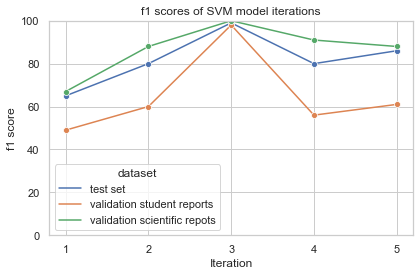

In [159]:
df_tmp = df[["Iteration", "F1 score (Test)", "F1 student reports", "F1 scientific papers"]]\
    .rename({"F1 score (Test)":"test set",
            "F1 student reports": "validation student reports",
            "F1 scientific papers": "validation scientific repots"}, axis=1)\
    .melt('Iteration', var_name="dataset", value_name='f1 score')

ax = sns.lineplot(data=df_tmp,
                  x="Iteration",
                  y="f1 score",
                  marker="o",
                  hue="dataset")

ax.set_title("f1 scores of SVM model iterations")
ax.set_ylim((0,100))
ax.set_xticks([1,2,3,4,5])
plt.tight_layout()

plt.savefig(os.path.join("plots","svm_iterations_f1.png"), facecolor='white', dpi=300)

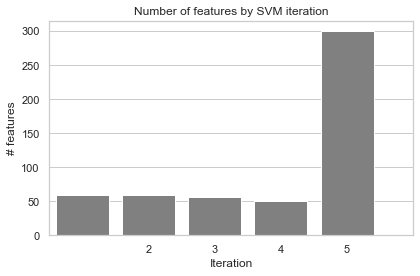

In [160]:
ax = sns.barplot(data=df, x="Iteration", y="n_features", color="grey")
ax.set_title("Number of features by SVM iteration")
ax.set_xticks([1,2,3,4,5])
ax.set_ylabel("# features")
plt.tight_layout()
plt.savefig(os.path.join("plots","svm_iterations_num_features.png"), facecolor='white', dpi=300)

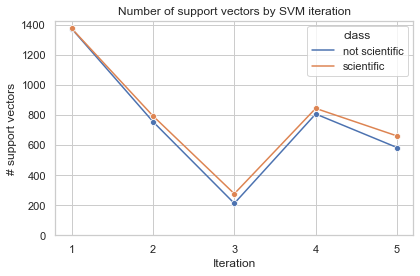

In [162]:
df_tmp = df[["Iteration", "support vectors class 0", "support vectors class 1"]]\
    .rename({"support vectors class 0":"not scientific",
            "support vectors class 1": "scientific"}, axis=1)\
    .melt('Iteration', var_name="class", value_name='support vectors')

ax = sns.lineplot(data=df_tmp,
                  x="Iteration",
                  y="support vectors",
                  marker="o",
                  hue="class")

ax.set_title("Number of support vectors by SVM iteration")
ax.set_xticks([1,2,3,4,5])
ax.set_ylabel("# support vectors")
ax.set_ylim((0,1425))
plt.tight_layout()

plt.savefig(os.path.join("plots","svm_iterations_support_vectors.png"), facecolor='white', dpi=300)

In [163]:
import nltk.help

In [164]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or